In [1]:
#standard ds imports
import pandas as pd
import numpy as np

#viz and stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

###
# inside acquire.py script:
from env import uname, pwd, host
import env
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import wrangle
from sklearn.model_selection import train_test_split
from scipy import stats
import sklearn.preprocessing

In [2]:
train,validate,test = wrangle.wrangle_zillow()
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1198531 entries, 1941838 to 2079094
Data columns (total 7 columns):
 #   Column         Non-Null Count    Dtype
---  ------         --------------    -----
 0   beds           1198531 non-null  int64
 1   baths          1198531 non-null  int64
 2   sqft           1198531 non-null  int64
 3   taxable_value  1198531 non-null  int64
 4   built          1198531 non-null  int64
 5   tax            1198531 non-null  int64
 6   fips           1198531 non-null  int64
dtypes: int64(7)
memory usage: 73.2 MB


In [3]:
cols = train.drop(columns=['fips','built']).columns.to_list()
train = wrangle.remove_outliers(train,cols)
train.shape

<class 'numpy.float64'>
1.5
<class 'numpy.float64'>
0.5
<class 'numpy.float64'>
-167.0
<class 'numpy.float64'>
-328980.25
<class 'numpy.float64'>
-3266.5


(1069215, 7)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1069215 entries, 1941838 to 2079094
Data columns (total 7 columns):
 #   Column         Non-Null Count    Dtype
---  ------         --------------    -----
 0   beds           1069215 non-null  int64
 1   baths          1069215 non-null  int64
 2   sqft           1069215 non-null  int64
 3   taxable_value  1069215 non-null  int64
 4   built          1069215 non-null  int64
 5   tax            1069215 non-null  int64
 6   fips           1069215 non-null  int64
dtypes: int64(7)
memory usage: 65.3 MB


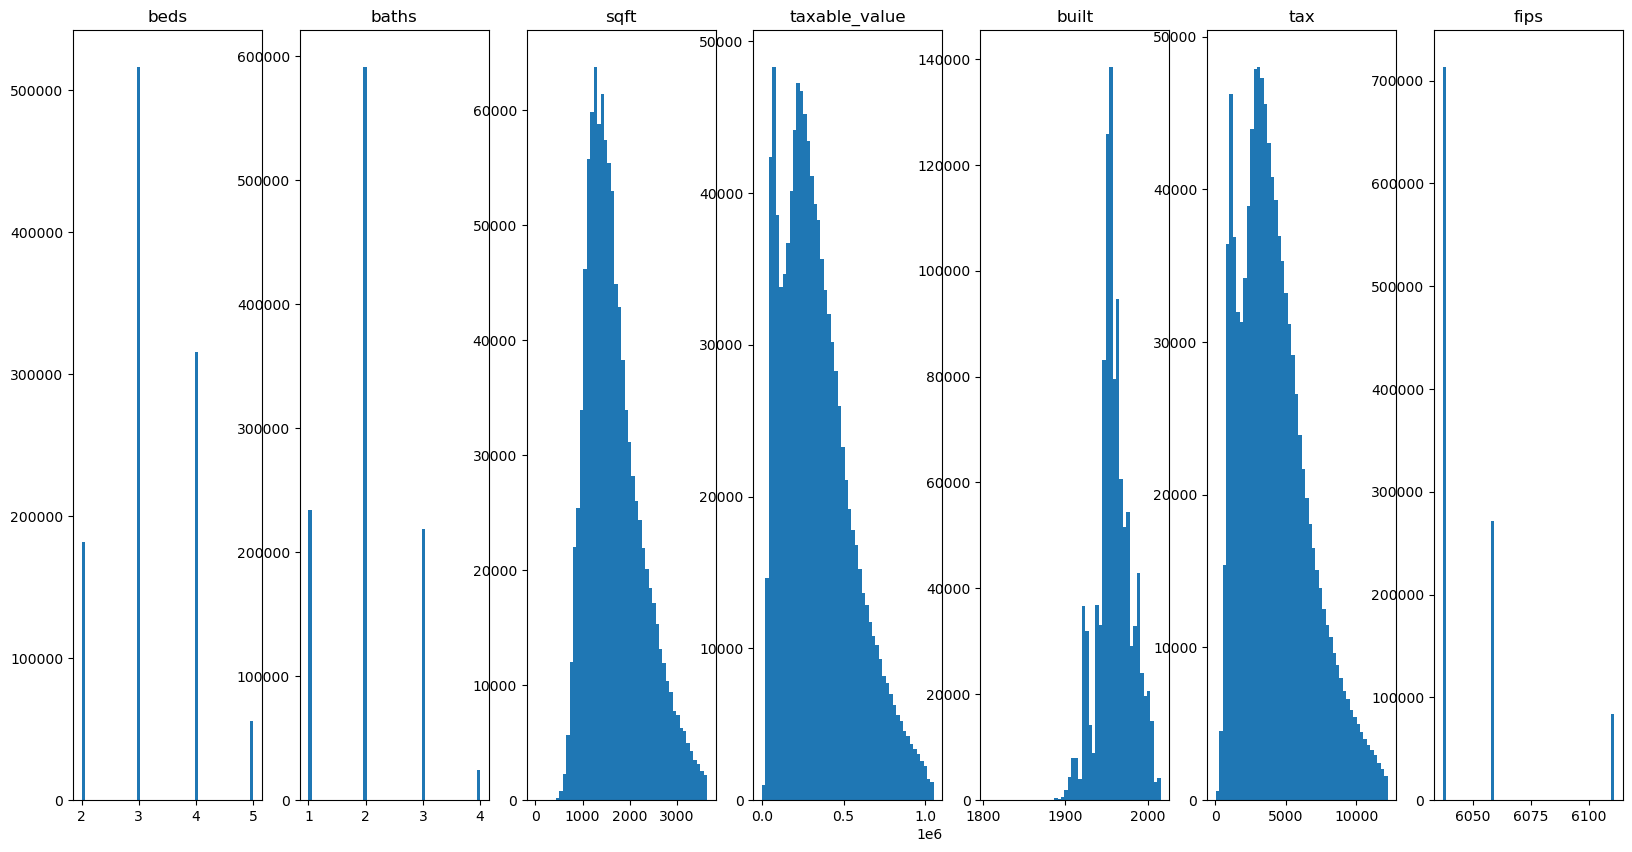

In [5]:
plt.figure(figsize=(20, 10))

# List of columns
cols = train.columns.to_list()
for i, col in enumerate(cols):
    # i starts at 0, but plot nos should start at 1
    subplot_num = i+1
    # Create subplot.
    plt.subplot(1,len(cols),subplot_num)
    # Title with column name.
    plt.title(col)
    # Display histogram for column.
    train[col].hist(bins=50)
    # Hide gridlines.
    plt.grid(False)
    plt.ticklabel_format(useOffset=False)
plt.show()

In [6]:
train_10_000 = train.sample(10_000)
train_1000 = train.sample(1000)

In [7]:
#4 Write a function for pairwise plots
def plot_variable_pairs(df):
    sns.pairplot(df,corner=True,kind='reg')

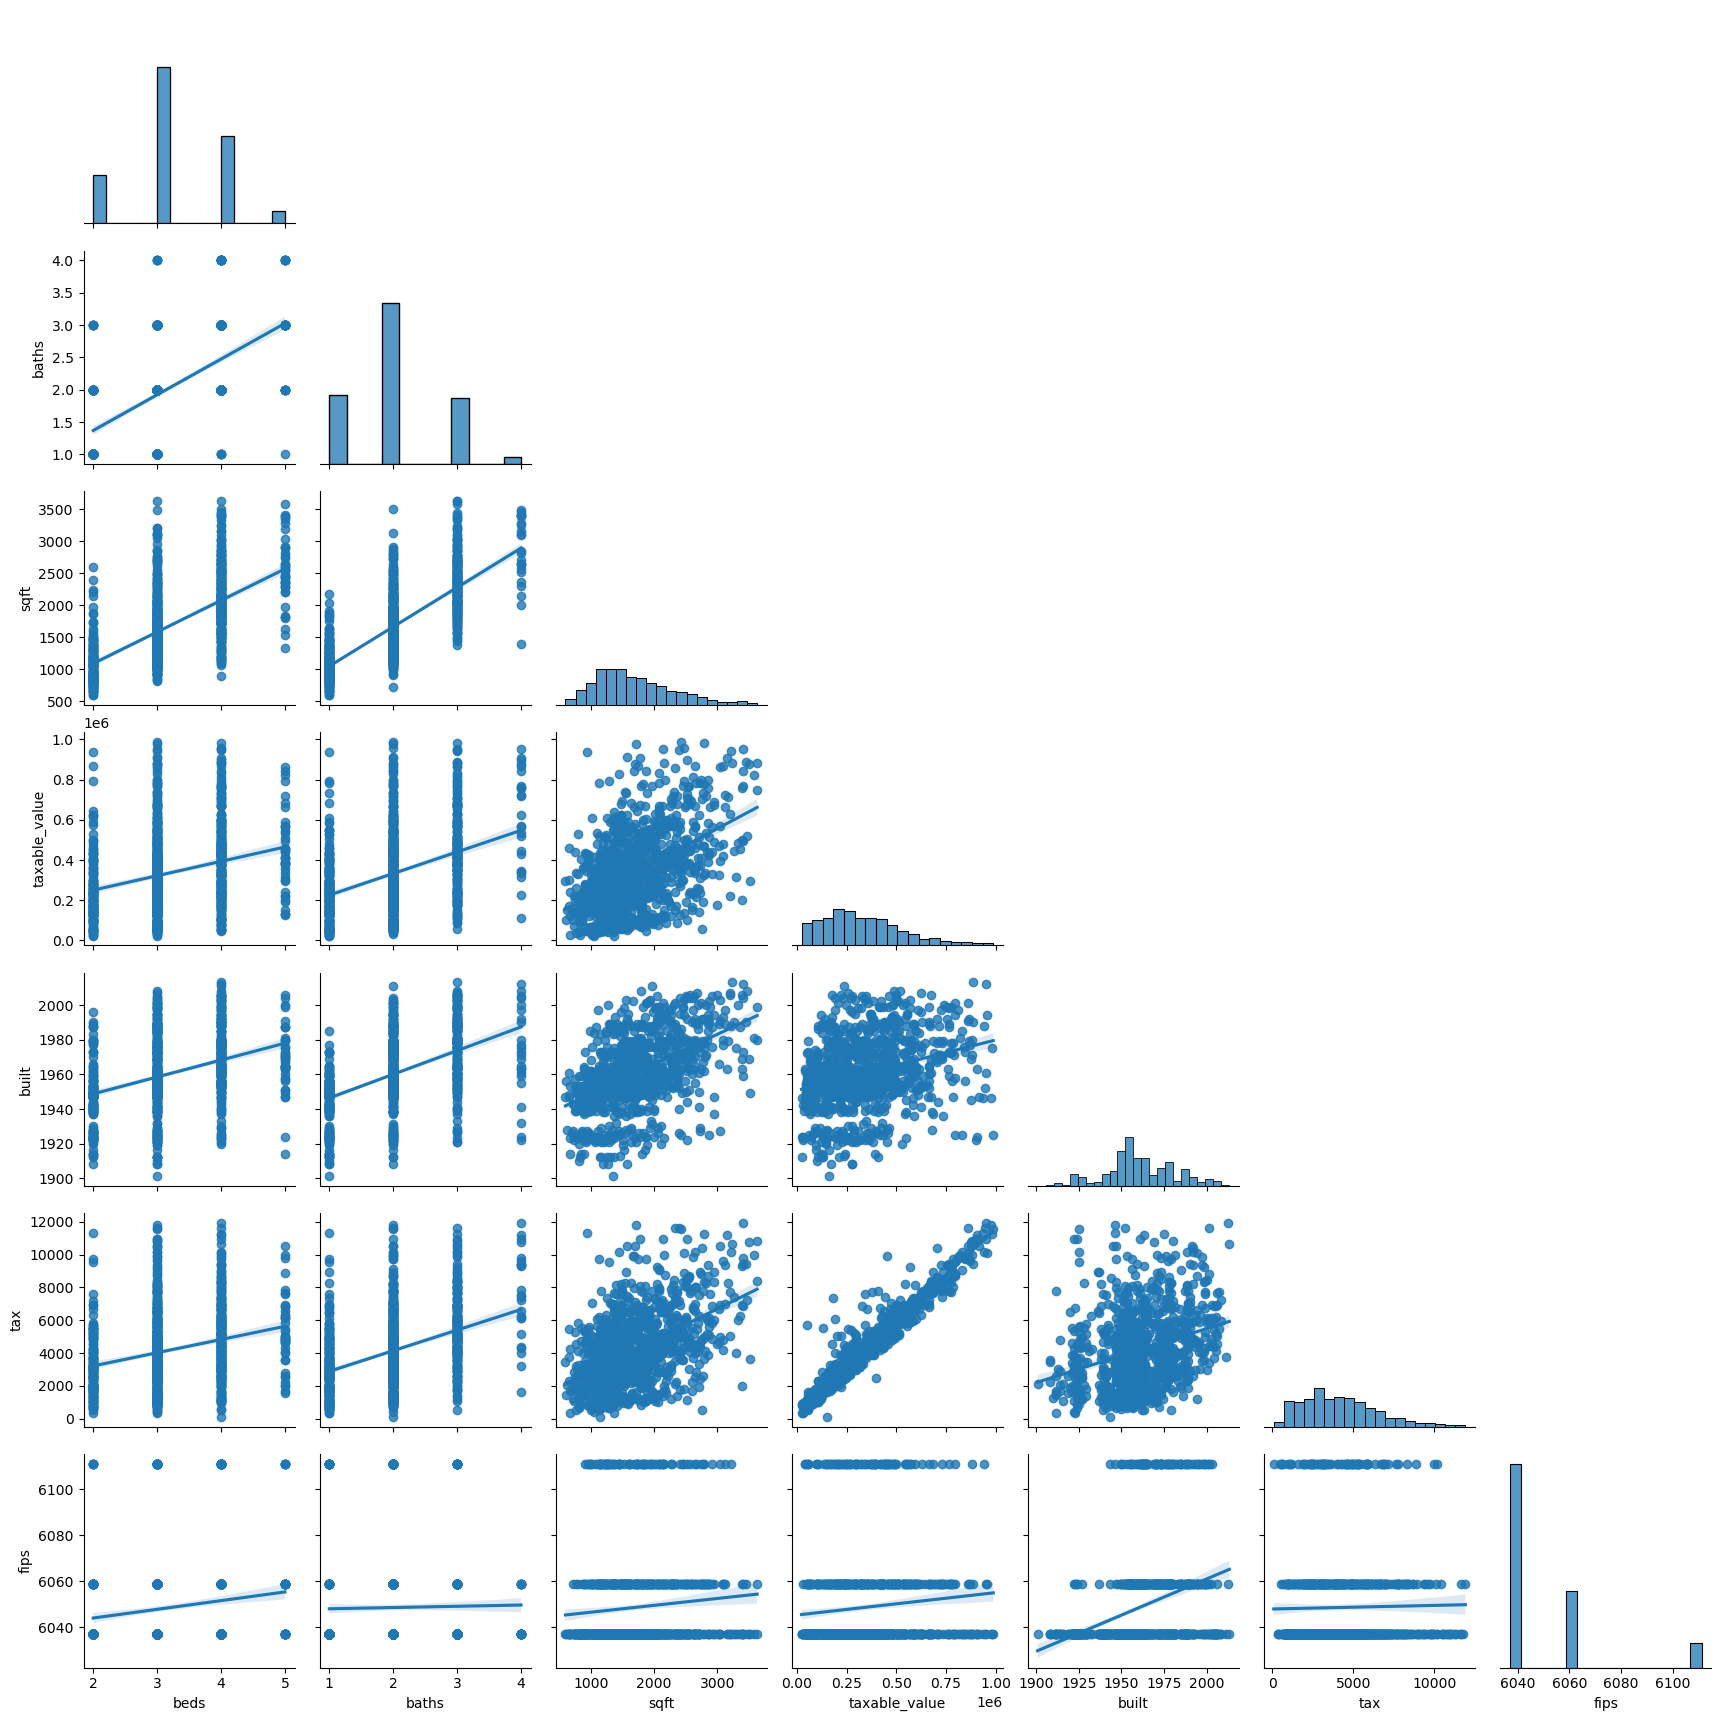

In [9]:
plot_variable_pairs(train_1000)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft'>

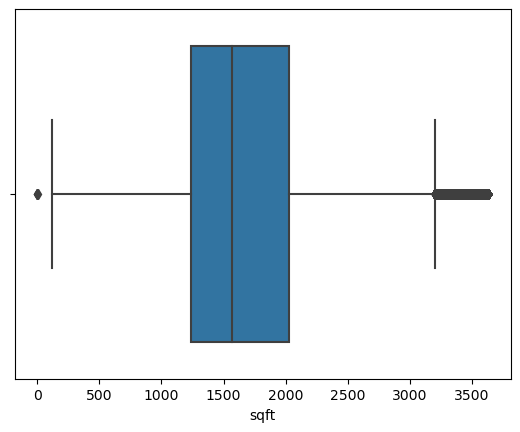

In [10]:
# train['sqft'].hist(grid=False, bins=50)
#sns.displot(train['sqft'])
sns.boxplot(train['sqft'])


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1069215 entries, 1941838 to 2079094
Data columns (total 7 columns):
 #   Column         Non-Null Count    Dtype
---  ------         --------------    -----
 0   beds           1069215 non-null  int64
 1   baths          1069215 non-null  int64
 2   sqft           1069215 non-null  int64
 3   taxable_value  1069215 non-null  int64
 4   built          1069215 non-null  int64
 5   tax            1069215 non-null  int64
 6   fips           1069215 non-null  int64
dtypes: int64(7)
memory usage: 65.3 MB


In [ ]:
train.beds.nunique(),train.baths.nunique(),train.fips.nunique()

In [ ]:
# # Separate Cats from Nums
# cat_cols,num_cols = [],[]
# for col in train.columns:
#     if train_iris[col].nunique() < 20:
#             cat_cols.append(col)
#         else:
#             num_cols.append(col)

In [ ]:
# (train.drop(columns='student_id')
# train.columns.to_list()

In [ ]:
# cat_cols = train.drop(columns=['sqft','taxable_value','built','tax']).columns.to_list()
# cat_cols

In [12]:
# 5 Write a function for plotting discrete and continuous variables via 3 different plots
def plot_categorical_and_continuous_vars(train):
    cat_cols = train.drop(columns=['sqft','taxable_value','built','tax']).columns.to_list()
    num_cols = train.drop(columns=['beds','baths','fips']).columns.to_list()
    
    for col in cat_cols:
        sns.countplot(data=train,x=col)
        plt.show()
        print('============')
    
    for col in num_cols:
        sns.histplot(data=train, x=col)
        plt.show()
        sns.boxplot(data=train, x=col)
        plt.show()
        print('============')
    

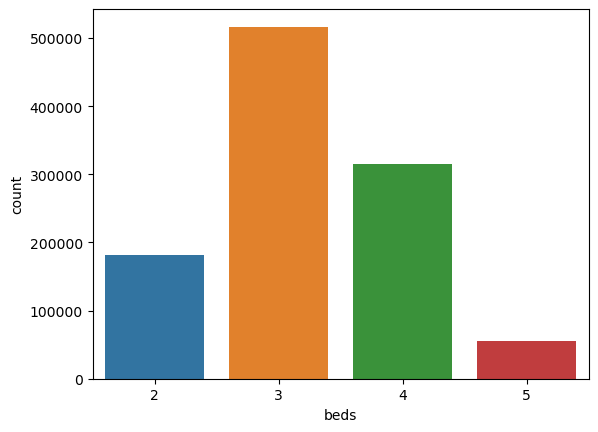

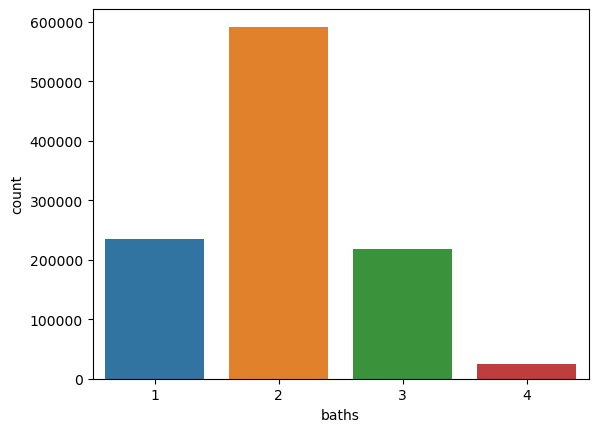

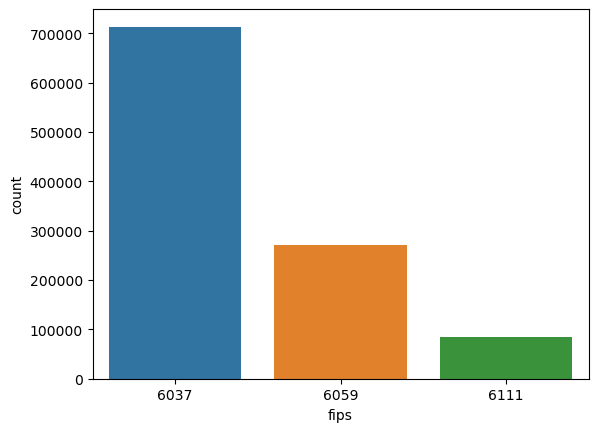

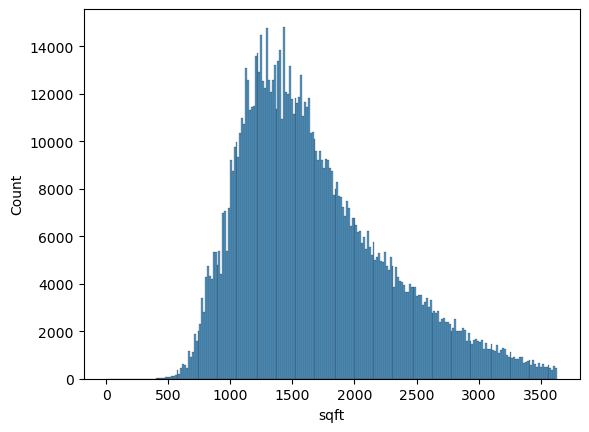

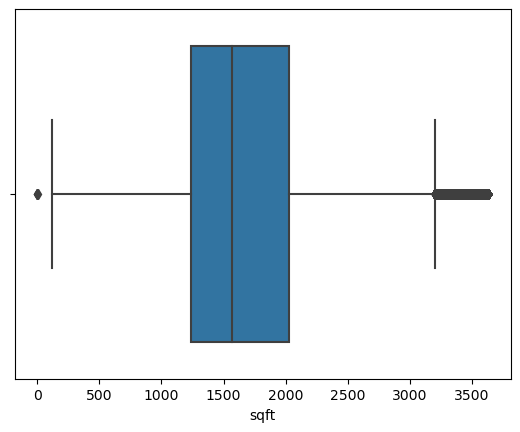

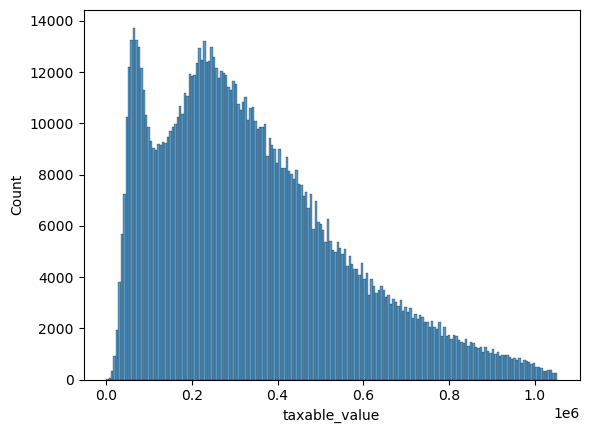

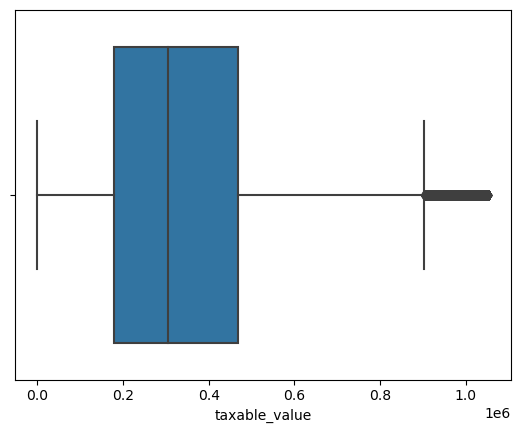

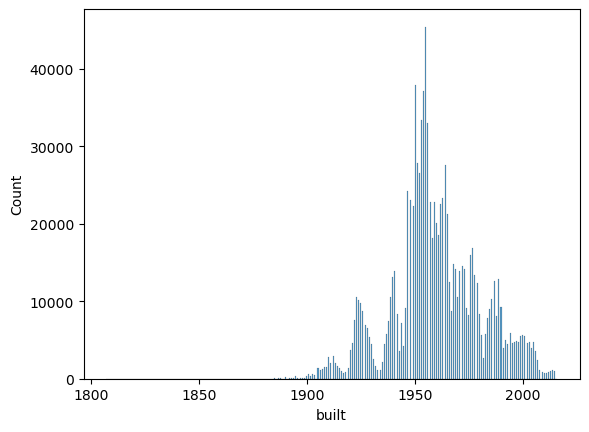

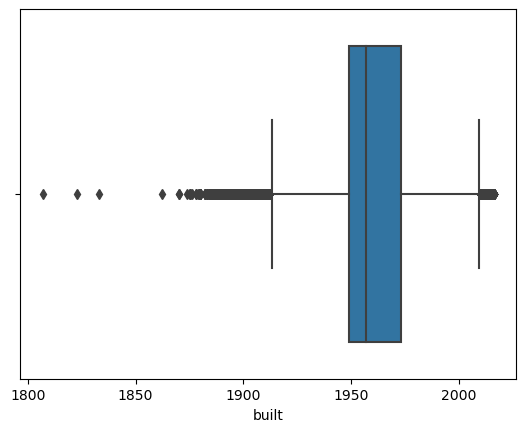

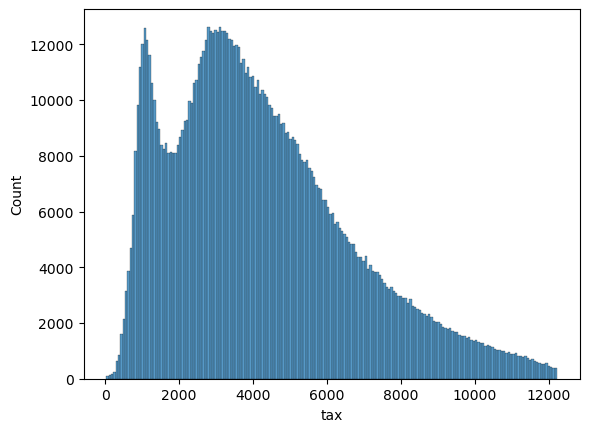

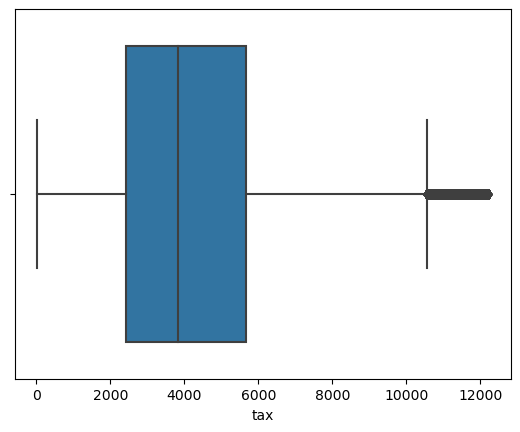

In [13]:
# 6 Using the functions...explore the dataset
plot_categorical_and_continuous_vars(train)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


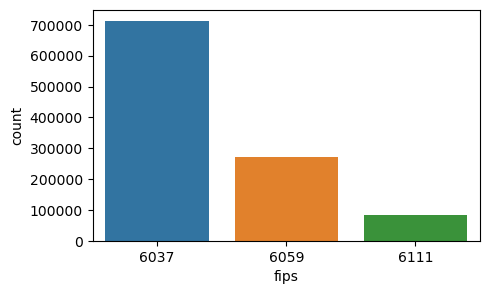

In [31]:
plt.figure(figsize=(5,3))
sns.countplot(train['fips']) # 37 is la cnty, 59 is orange cnty, 111 is ventura cnty VERY IMBALANCE
plt.show()

In [15]:
train.fips.value_counts(normalize=True)

6037    0.667316
6059    0.254404
6111    0.078280
Name: fips, dtype: float64

### Hypothesis

- ${H_0}$: No statistically significant difference exists between mean Taxable_Values in Ventura County and the mean of all others.
- ${H_a}$: A statistically significant difference exists between mean Taxable_Values in Ventura County and the mean of all others.

#### Two-tailed, One-Sample T-Test ANY DIFF in mean between a subset and overall

In [38]:
train[train.fips == 6111].taxable_value.mean()

375479.0504432603

In [46]:
train.taxable_value.mean()

342424.68676739477

In [42]:
α = 0.05
ventura_taxable_values = train[train.fips == 6111].taxable_value
overall_mean = train.taxable_value.mean()
t, p = stats.ttest_1samp(ventura_taxable_values,overall_mean)
print(t,p,α)

45.66237908007686 0.0 0.05


# Reject the NULL
### A statistically significant difference exists, there is evidence to suggest that the two samples were drawn from two distinct distributions.

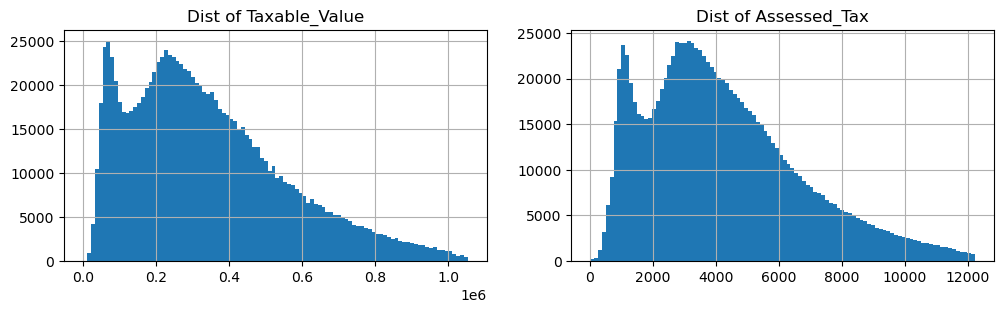

In [16]:
plt.figure(figsize=(12,3))

plt.subplot(1,2,1)
train['taxable_value'].hist(bins=100)
plt.title('Dist of Taxable_Value')

plt.subplot(1,2,2)
train['tax'].hist(bins=100)
plt.title('Dist of Assessed_Tax')

plt.show()

### Hypothesis

- ${H_0}$: No statistically significant correlation exists between Taxable_Values and SqFt.
- ${H_a}$: A statistically significant correlation exists between Taxable_Values and SqFt.

#### Correlaton Test-Pearson's...data appears more linear than curvilinear

In [48]:
α = 0.05

r, p = stats.pearsonr(train['taxable_value'],train['sqft'])
print(r,p,α)

0.4576861804688007 0.0 0.05


# Reject the NULL
### A statistically significant difference exists, there is evidence to suggest that a correlation exists between the two variables, however that correlation is NOT STRONG ~0.458

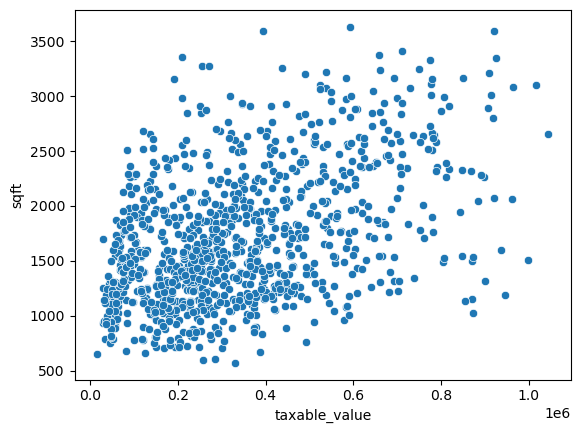

In [127]:
train_1000 = train.sample(1000)
sns.scatterplot(data=train_1000, x='taxable_value',y='sqft')
plt.show()

In [ ]:
# 10 What INDEPENDENT variables correlated with DEPENDENT VARIABLE?

# ASSESSED TAX,sqft, [beds, baths] assuming we are treating these last two as continuous

In [ ]:
# 11 Which INDEPENDENT variables are correlated with other INDEPENDENT variables (multi-colinearity)?

# assessed_tax, sqft, beds, baths, (year_built correlated with sqft)